In [3]:
import innvestigate
import innvestigate.utils
import keras.applications.vgg16 as vgg16

eutils = imp.load_source("utils", "../utils.py")

# Get some example test set images.
images, label_to_class_name = eutils.get_imagenet_data(net["image_shape"][0])

if not len(images):
    raise Exception("Please download the example images using: "
                    "'innvestigate/examples/images/wget_imagenet_2011_samples.sh'")

# Choose a sample image and add batch axis
image = images[0][0][None, :, :, :]
# Preprocess it for VGG16
image_pp = imgnetutils.preprocess(image, net)
# Displaying the image
plot.imshow(image[0]/255)
plot.show()

# Get model
model, preprocess = vgg16.VGG16(), vgg16.preprocess_input
# Strip softmax layer
model = innvestigate.utils.model_wo_softmax(model)

# Create analyzer
analyzer = innvestigate.create_analyzer("deep_taylor", model)

# Add batch axis and preprocess
x = preprocess(image[None])
# Apply analyzer w.r.t. maximum activated output-neuron
a = analyzer.analyze(x)

# Aggregate along color channels and normalize to [-1, 1]
a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
a /= np.max(np.abs(a))
# Plot
plt.imshow(a[0], cmap="seismic", clim=(-1, 1))

NameError: name 'imp' is not defined

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import innvestigate
import innvestigate.utils
import numpy as np
import matplotlib.pyplot as plt
import keras

from PIL import Image

from utils.explain import get_classifier, create_train_val, get_datasets, ClassifierTrainer

Using TensorFlow backend.


In [3]:
IMG_HEIGHT = 32
model, preprocessing_layer = get_classifier((IMG_HEIGHT,IMG_HEIGHT,3))














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
    
def lr_schedule(epoch, lr):
    """
    Returns a custom learning rate that decreases as epochs progress.
    """
    if epoch <= 25:
        return lr
    if epoch <= 50:
        return lr/10
    if epoch <= 75:
        return lr/100
    else:
        return lr/1000

optimiser = keras.optimizers.Adam(lr=1e-3)

In [6]:
train_dataset, val_dataset = get_datasets('classifier_train_data',
                                          'classifier_val_data',
                                          preprocessing_layer,
                                          img_height=IMG_HEIGHT,
                                          img_width=IMG_HEIGHT,
                                          batch_size=32)

Found 3745 images belonging to 19 classes.
Found 913 images belonging to 19 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


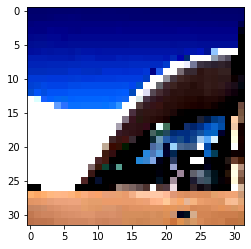

In [7]:
X, y = next(iter(val_dataset))
plt.imshow(X[1]*0.5+0.5)
plt.show()

In [8]:
trainer = ClassifierTrainer(train_dataset, val_dataset, model, optimiser, lr_schedule)

In [9]:
trainer.train()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




Epoch 1/10
 79/118 [===================>..........] - ETA: 21s - loss: 9.0306 - acc: 0.1072

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/starlight/opt/anaconda3/envs/tf1/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-3435b262f1ae>", line 1, in <module>
    trainer.train()
  File "/Users/starlight/Desktop/creative-machine-learning/utils/explain.py", line 157, in train
    callbacks=[self.cp_callback, self.tensorboard_callback, self.lr_callback],
  File "/Users/starlight/opt/anaconda3/envs/tf1/lib/python3.7/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/Users/starlight/opt/anaconda3/envs/tf1/lib/python3.7/site-packages/keras/engine/training.py", line 1418, in fit_generator
    initial_epoch=initial_epoch)
  File "/Users/starlight/opt/anaconda3/envs/tf1/lib/python3.7/site-packages/keras/engine/training_generator.py", line 217, in fit_generator
    class_weight=class_weight)
  File "/Users/starlight/op

TypeError: object of type 'NoneType' has no len()

In [57]:
len(train_dataset)

118

In [6]:
analyzer = innvestigate.create_analyzer("deep_taylor", model)

In [16]:
preprocessing_layer(np.array(Image.open('classifier_data/google_pavilion_2000/0385529262.jpg'))).shape

(600, 900, 3)

In [44]:
keras.backend

<module 'keras.backend' from '/Users/starlight/opt/anaconda3/envs/tf1/lib/python3.7/site-packages/keras/backend/__init__.py'>

In [57]:
create_train_val()

Completed for google_pavilion_2011
Completed for google_pavilion_2016
Completed for google_pavilion_2018
Completed for google_pavilion_2019
Completed for google_pavilion_2017
Completed for google_pavilion_2010
Completed for google_pavilion_2003
Completed for google_pavilion_2005
Completed for google_pavilion_2002
Completed for google_pavilion_2015
Completed for google_pavilion_2012
Completed for google_pavilion_2013
Completed for google_pavilion_2014
Completed for google_pavilion_2009
Completed for google_pavilion_2007
Completed for google_pavilion_2000
Completed for google_pavilion_2001
Completed for google_pavilion_2006
Completed for google_pavilion_2008
Completed Generation of Train and Val Sets


In [38]:
os.getcwd()

'/Users/starlight/Desktop/creative-machine-learning'

In [49]:
from glob import glob
glob('/Users/starlight/Desktop/creative-machine-learning/classifier_data/*')[0]

'/Users/starlight/Desktop/creative-machine-learning/classifier_data/google_pavilion_2011'

In [50]:
os.getcwd()

'/Users/starlight/Desktop/creative-machine-learning'